In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/python2/2.7.8/x86_64/gcc46/nonet/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/no_pymc')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamz_5chain_'+str(trace)+'_sampled_params_chain_0.npy')]
    traces[trace][0] = np.concatenate((traces[trace][0], np.load('earm_dreamzs_12chain_'+str(trace)+'_2_sampled_params_chain_0.npy')), axis=0)
    for chain in range(1, 5):
        traces[trace].append(np.load('earm_dreamz_5chain_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))
        traces[trace][chain] = np.concatenate((traces[trace][chain], np.load('earm_dreamzs_12chain_'+str(trace)+'_2_sampled_params_chain_'+str(chain)+'.npy')), axis=0)
    

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamz_5chain_'+str(trace)+'_logps_chain_0.npy')]
    logps[trace][0] = np.concatenate((logps[trace][0], np.load('earm_dreamzs_12chain_'+str(trace)+'_2_logps_chain_0.npy')), axis=0)
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 5):
        logps[trace].append(np.load('earm_dreamz_5chain_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        logps[trace][chain] = np.concatenate((logps[trace][chain], np.load('earm_dreamzs_12chain_'+str(trace)+'_2_logps_chain_'+str(chain)+'.npy')), axis=0)
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-115102.04394993]
 [-115102.04394993]
 [-115102.04394993]
 ..., 
 [  -4976.66249989]
 [  -4976.3245805 ]
 [  -4976.3245805 ]]
Logp of trace:  a  chain:  1  =  [-4976.38118657]
Logp of trace:  a  chain:  2  =  [-4980.15044619]
Logp of trace:  a  chain:  3  =  [-4974.1533938]
Logp of trace:  a  chain:  4  =  [-4980.13287244]
Logp of trace:  b  chain: 0 =  [[-1082371.00690368]
 [-1082371.00690368]
 [-1082176.22672939]
 ..., 
 [   -4868.28589796]
 [   -4868.28589796]
 [   -4868.28589796]]
Logp of trace:  b  chain:  1  =  [-4884.55215283]
Logp of trace:  b  chain:  2  =  [-4933.14470219]
Logp of trace:  b  chain:  3  =  [-5000.48538755]
Logp of trace:  b  chain:  4  =  [-4882.51346958]
Logp of trace:  c  chain: 0 =  [[-1088536.13172141]
 [-1088535.98719276]
 [-1088535.98719276]
 ..., 
 [   -4753.76818254]
 [   -4753.76818254]
 [   -4753.76818254]]
Logp of trace:  c  chain:  1  =  [-4982.67767183]
Logp of trace:  c  chain:  2  =  [-4997.58811382]
Logp of trac

In [5]:
from earm_exp_parameters import earm_rates
uni_idx = []
norm_idx = []
uni_n = 0
norm_n = 0
for i, param in enumerate(model.parameters_rules()):
    if earm_rates[param.name]['type'] == 'uniform':
        uni_idx.append(i)
        uni_n += 1
    elif earm_rates[param.name]['type'] == 'normal':
        norm_idx.append(i)
        norm_n += 1

kf mito:  -14.8452186131  -  0.154781386928
kr mito:  -4.15478138693  -  13.8452186131
kf cyto:  -16.0001205731  -  -1.00012057306
kr cyto:  -2.99987942694  -  15.0001205731


In [6]:
traces['b'][0][:,72]

array([-7.87543121, -7.87543121, -7.87543121, ..., -8.35405317,
       -8.35405317, -8.35405317])

In [7]:
traces['a'][0][:,72]

array([-8.49299035, -8.49299035, -8.49299035, ..., -9.09548405,
       -9.09548405, -9.09548405])

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    uni_param_n = 0
    norm_param_n = uni_n
    for i, param in enumerate(model.parameters_rules()):
        if i in uni_idx:
            param_trace_dict_a[param.name] = [traces[run][chain][:,uni_param_n] for chain in range(len(traces[run]))]
            uni_param_n += 1
        else:
            param_trace_dict_a[param.name] = [traces[run][chain][:,norm_param_n] for chain in range(len(traces[run]))]
            norm_param_n += 1
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  103  of  105  parameters.
Percent of parameters with GR below 1.2:  98.0952380952
Number of parameters with GR below 1.1:  95  of  105  parameters.
Percent of parameters with GR below 1.1:  90.4761904762


[103, 98.09523809523809, 95, 90.47619047619048]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  99  of  105  parameters.
Percent of parameters with GR below 1.2:  94.2857142857
Number of parameters with GR below 1.1:  91  of  105  parameters.
Percent of parameters with GR below 1.1:  86.6666666667


[99, 94.28571428571428, 91, 86.66666666666667]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  95  of  105  parameters.
Percent of parameters with GR below 1.2:  90.4761904762
Number of parameters with GR below 1.1:  91  of  105  parameters.
Percent of parameters with GR below 1.1:  86.6666666667


[95, 90.47619047619048, 91, 86.66666666666667]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  98  of  105  parameters.
Percent of parameters with GR below 1.2:  93.3333333333
Number of parameters with GR below 1.1:  91  of  105  parameters.
Percent of parameters with GR below 1.1:  86.6666666667


[98, 93.33333333333333, 91, 86.66666666666667]

In [18]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-6.77612451, -6.97098072, -6.97098072, ..., -7.34136038,
        -7.34136038, -7.34136038]),
 array([-5.79900974, -5.79900974, -6.17962338, ..., -7.28525642,
        -7.28525642, -7.28525642]),
 array([-6.77612451, -6.68530477, -8.74497573, ..., -8.37873491,
        -8.37873491, -8.37873491])]

120000
5
120000


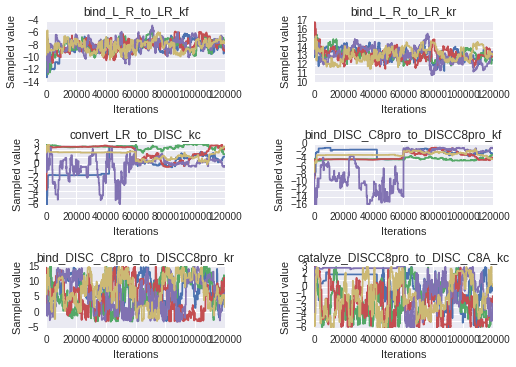

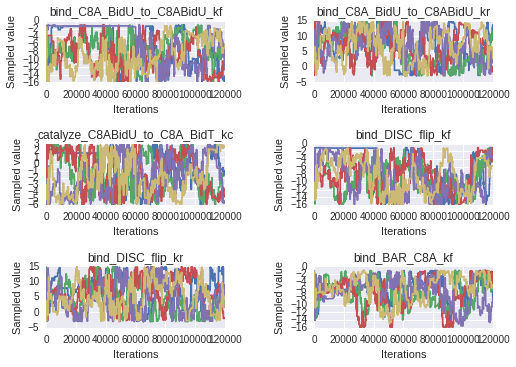

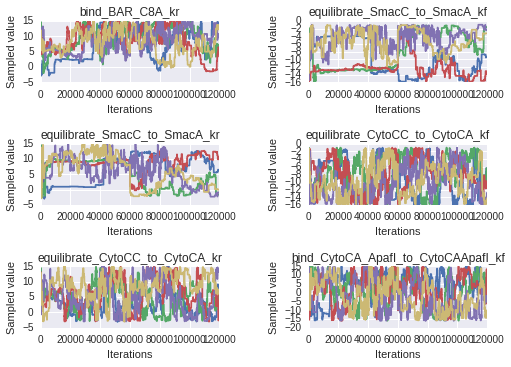

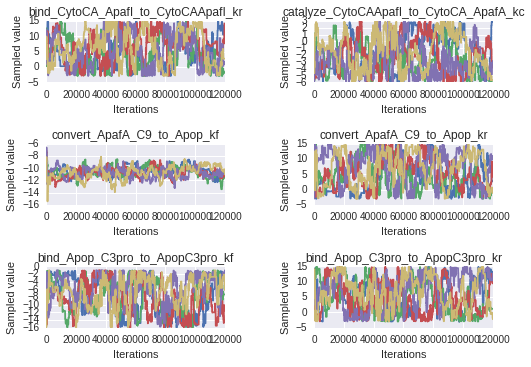

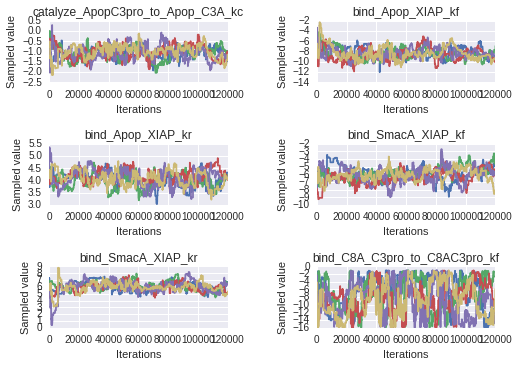

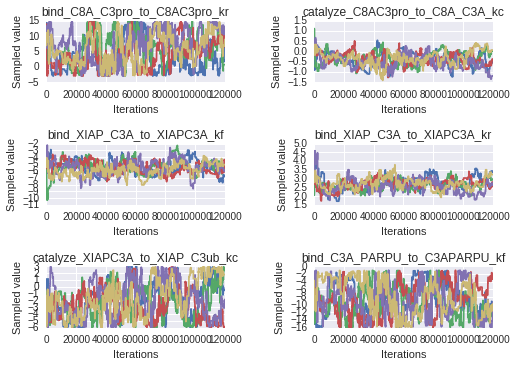

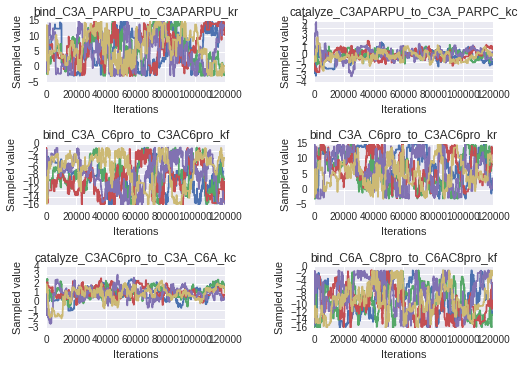

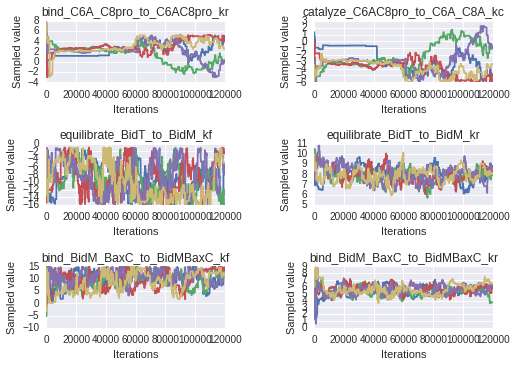

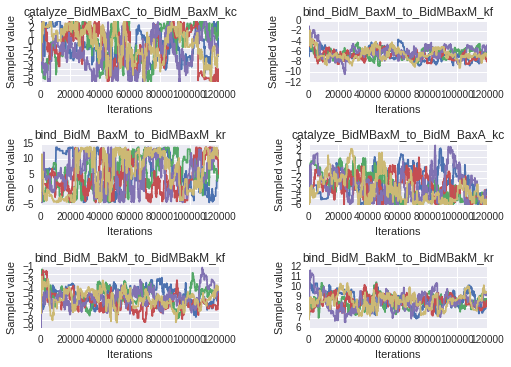

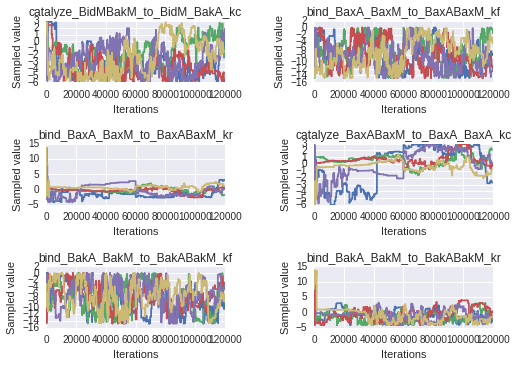

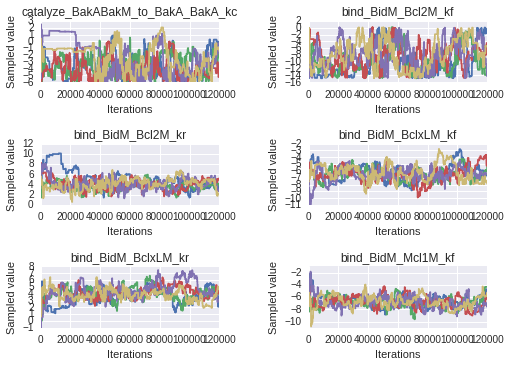

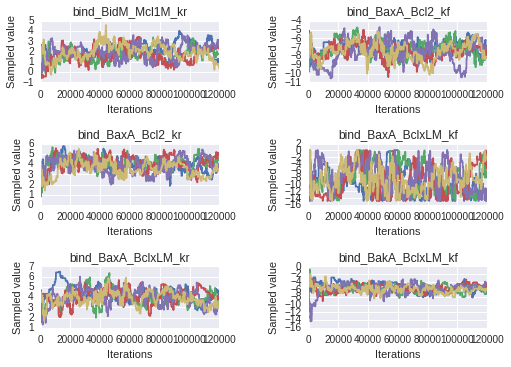

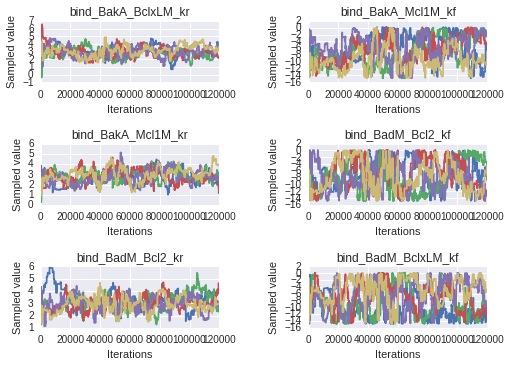

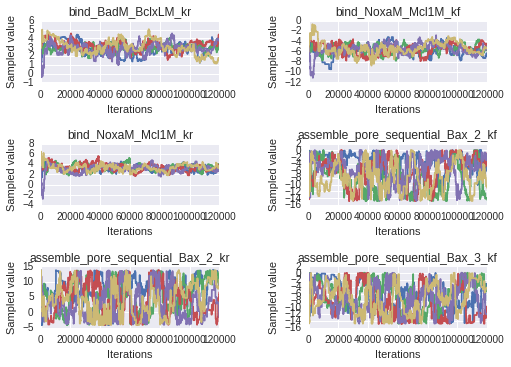

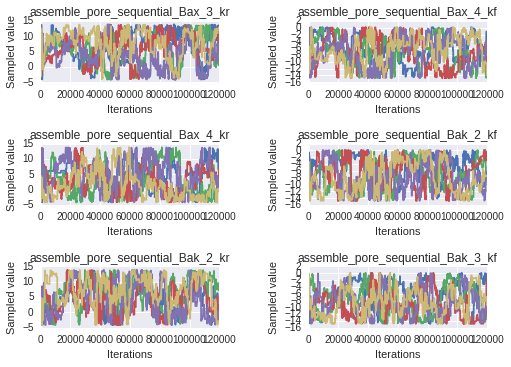

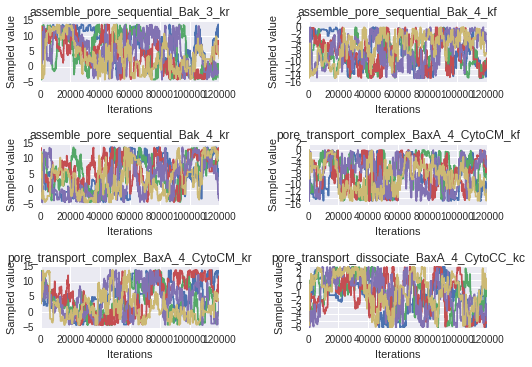

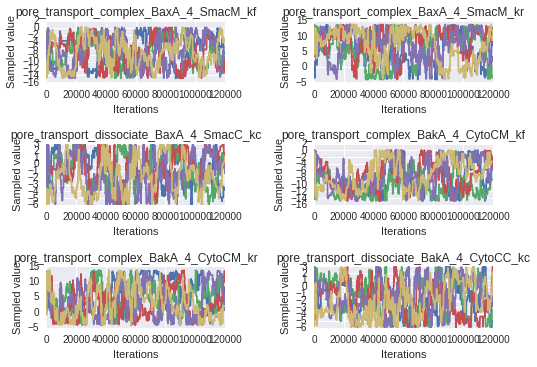

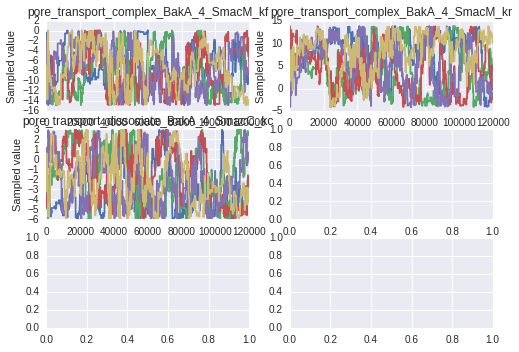

In [13]:
sample_plots(param_trace_dicts['a'])

In [14]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=30000, thin=10)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=30000, thin=10)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=30000, thin=10)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=30000, thin=10)

In [15]:
trace_arrays = [trace_arr_a, trace_arr_b, trace_arr_c, trace_arr_d]

/usr/local/python2/2.7.8/x86_64/gcc46/nonet/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


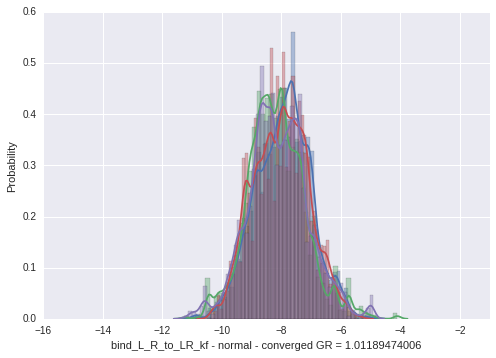

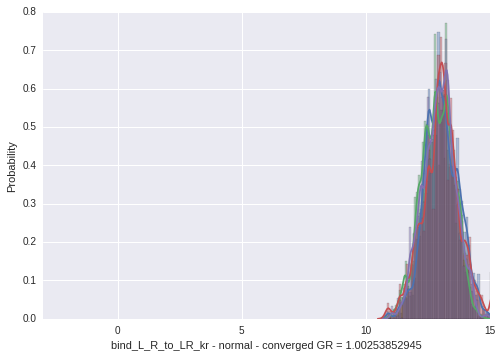

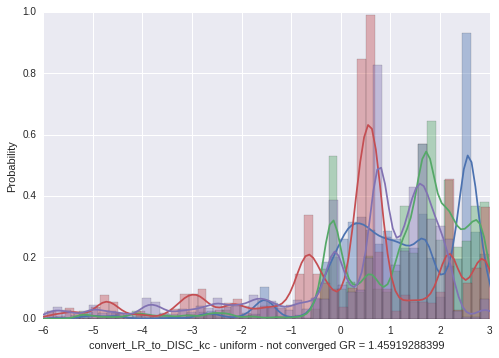

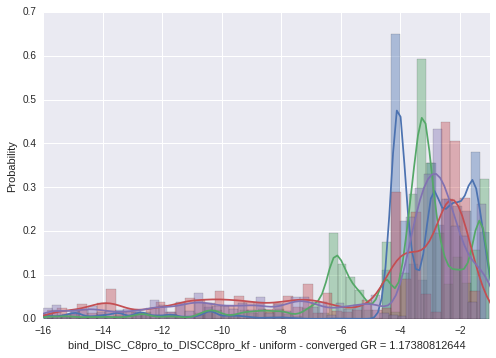

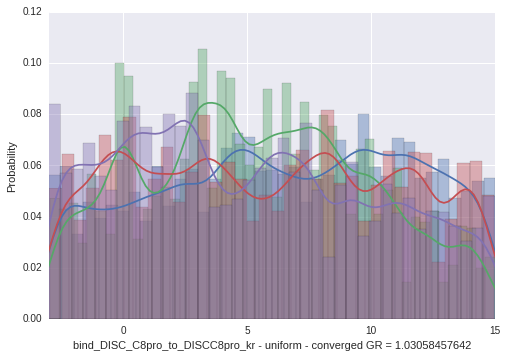

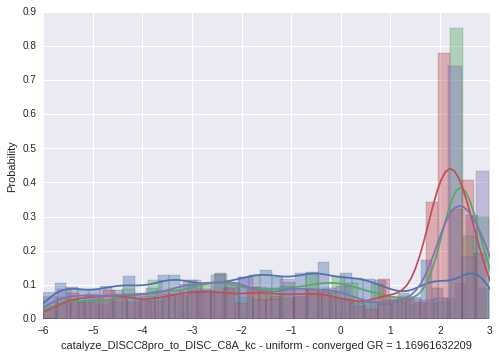

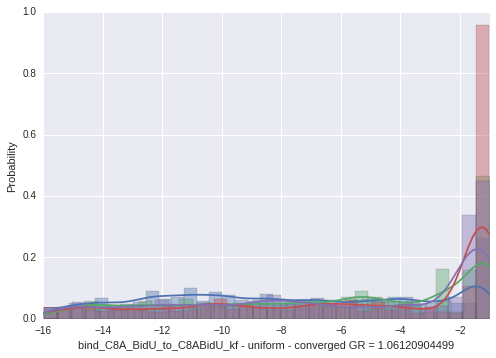

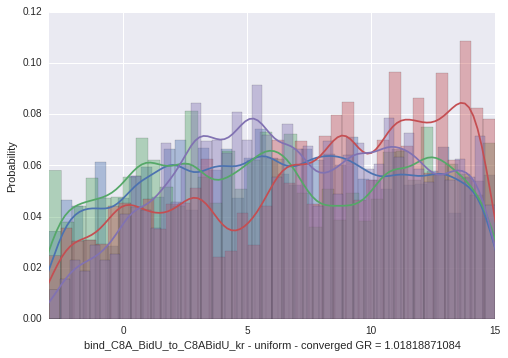

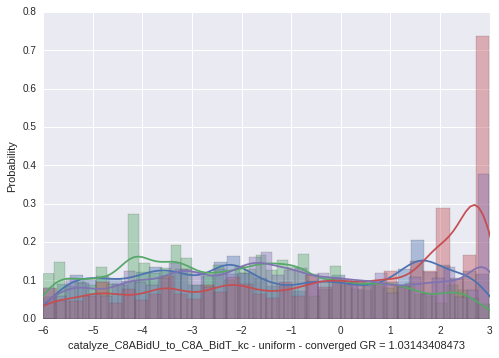

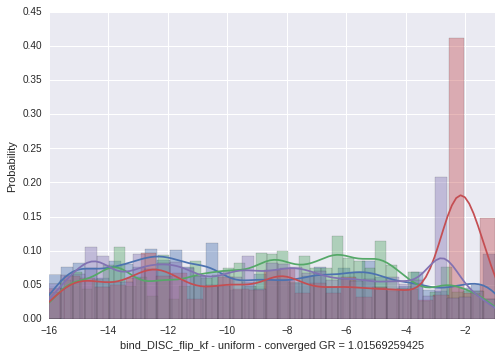

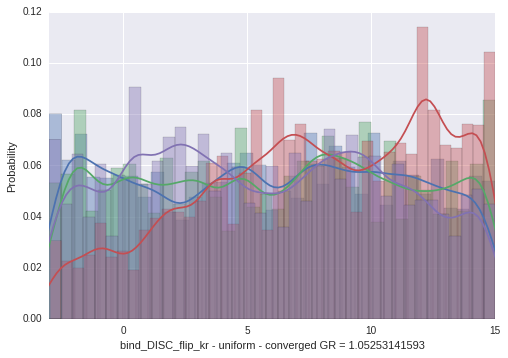

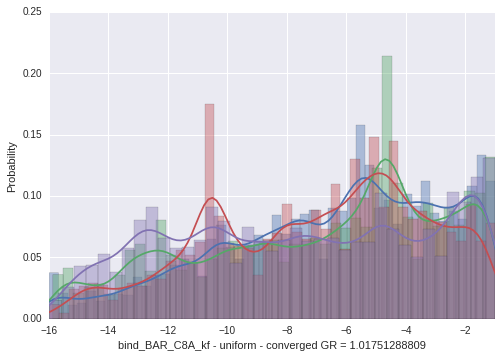

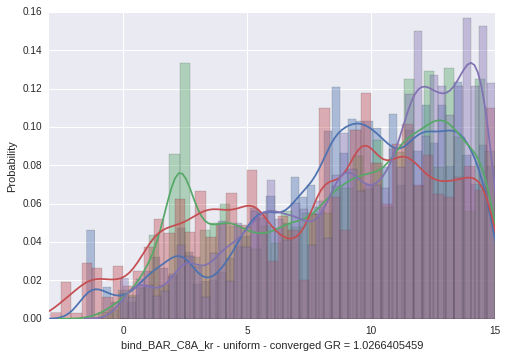

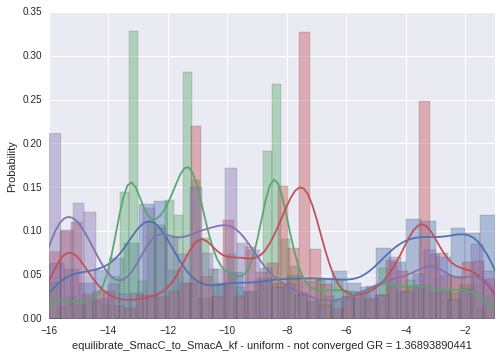

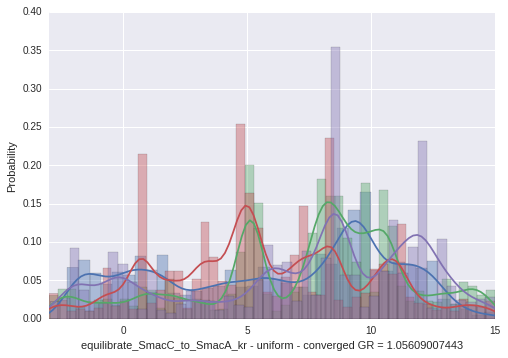

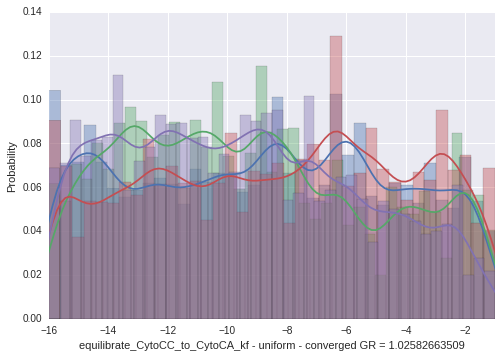

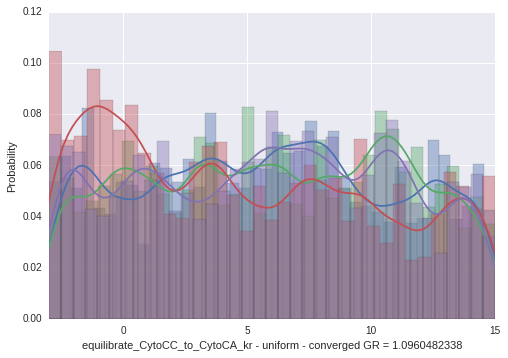

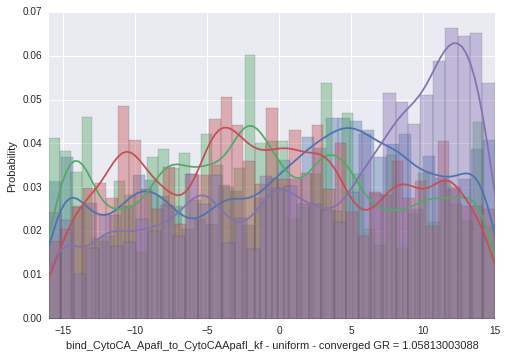

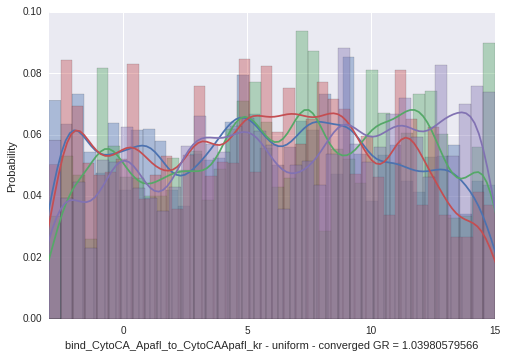

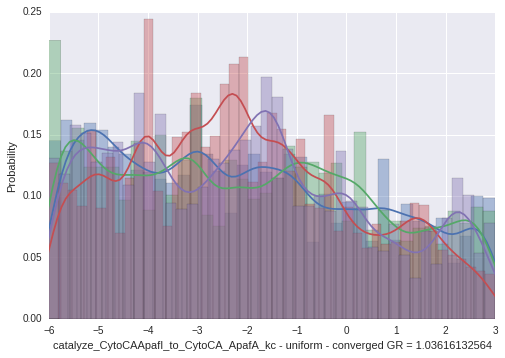

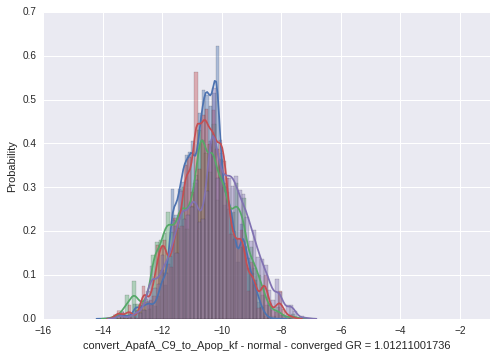

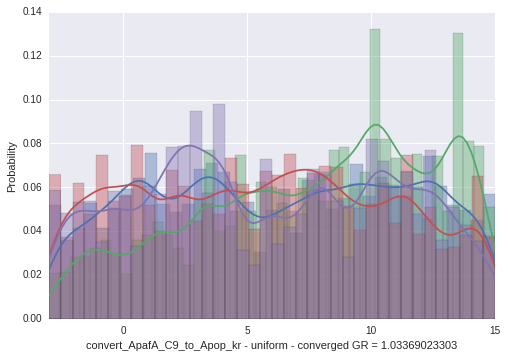

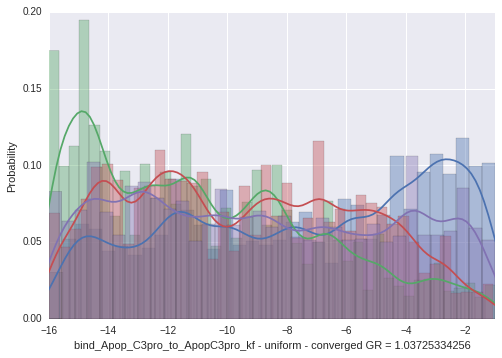

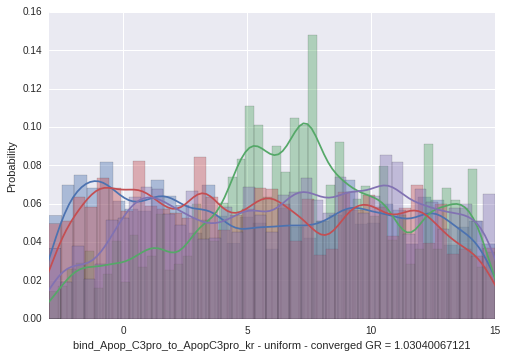

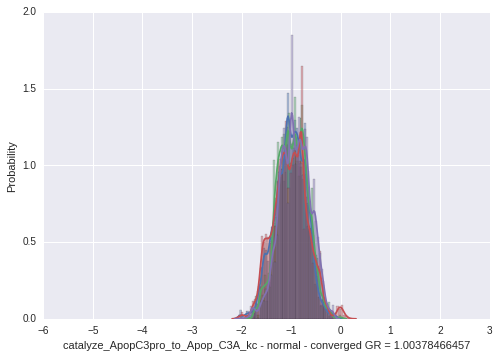

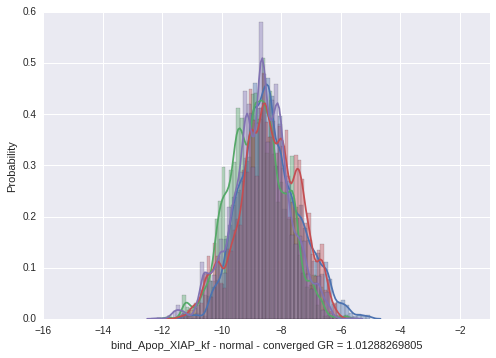

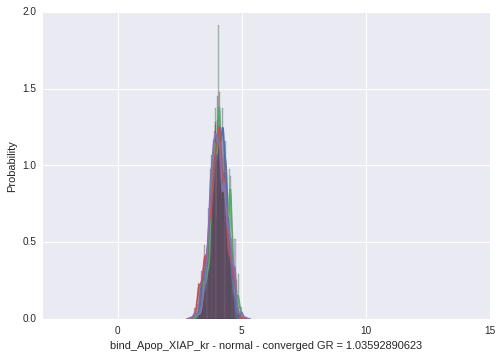

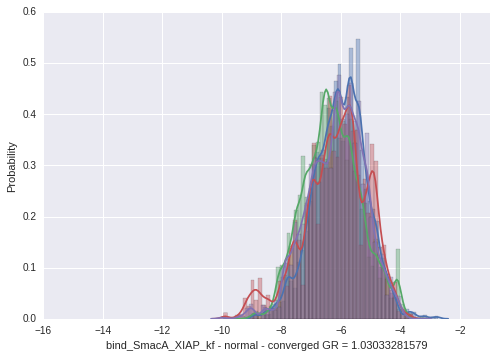

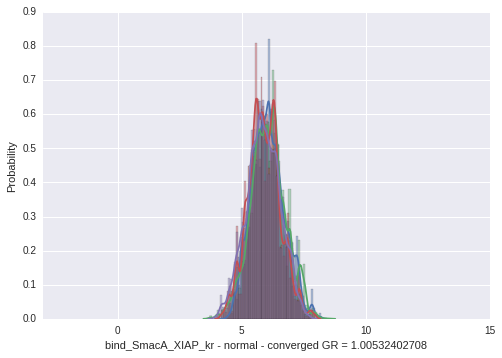

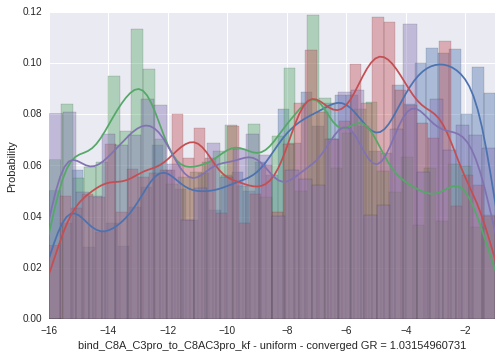

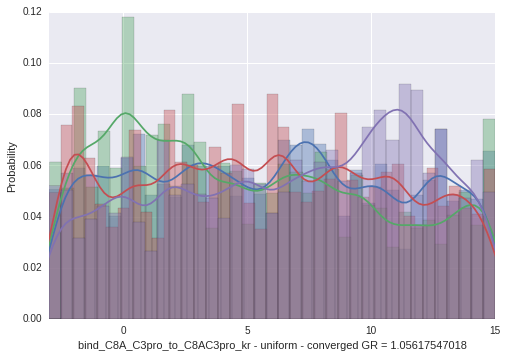

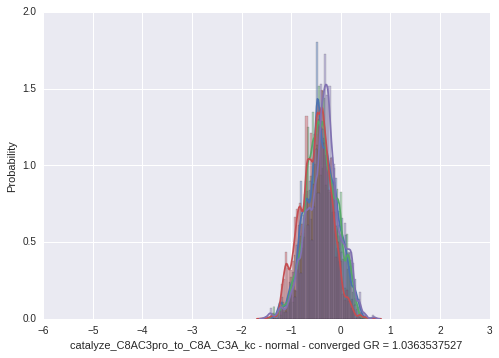

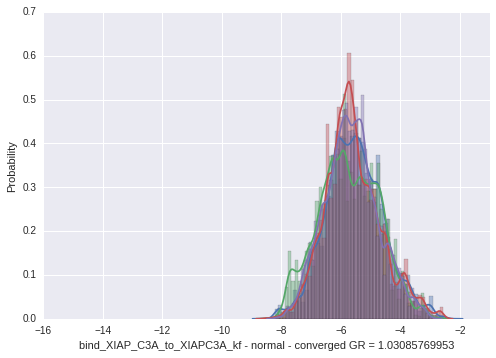

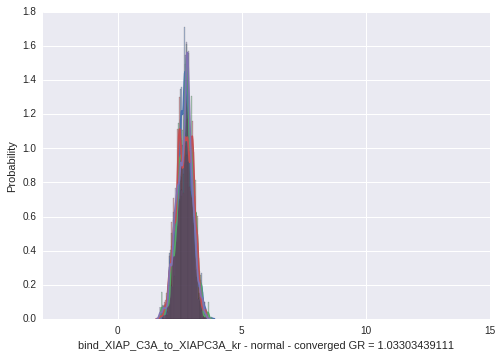

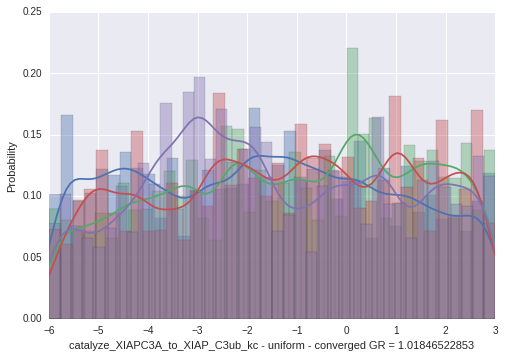

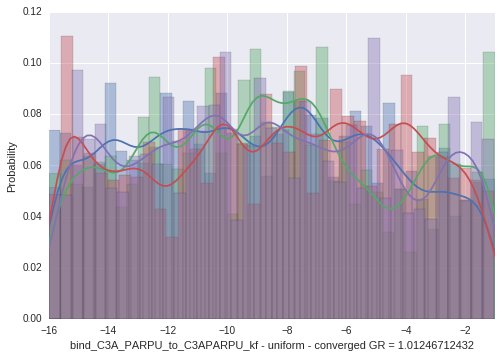

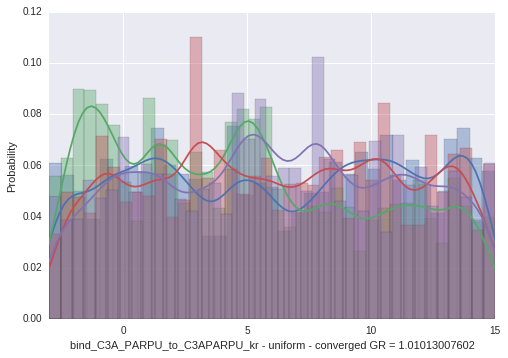

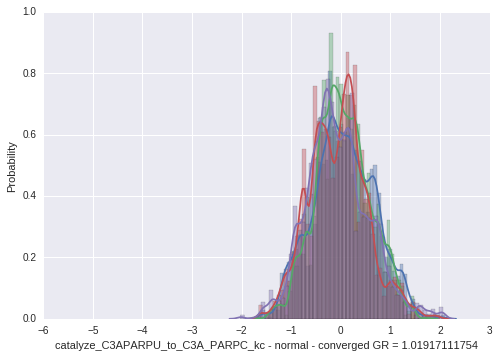

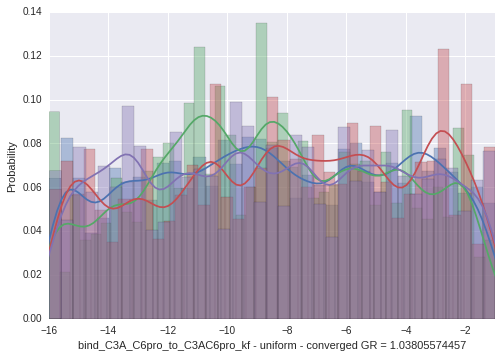

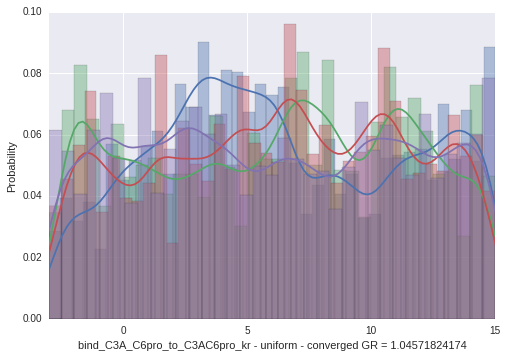

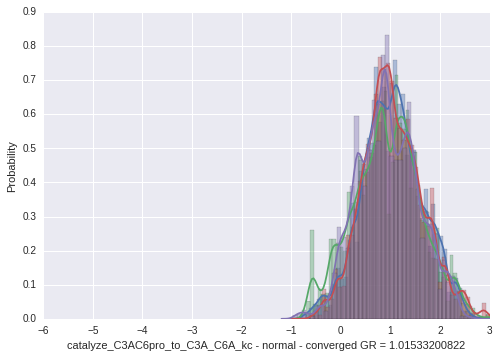

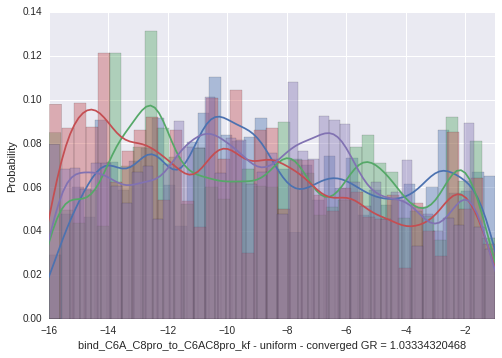

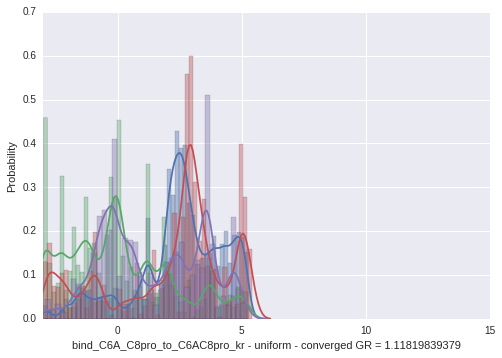

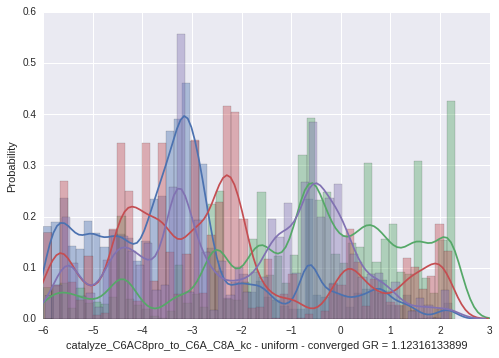

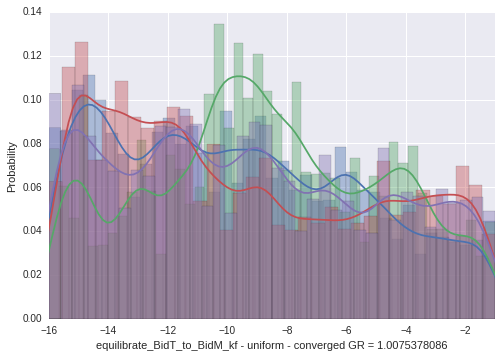

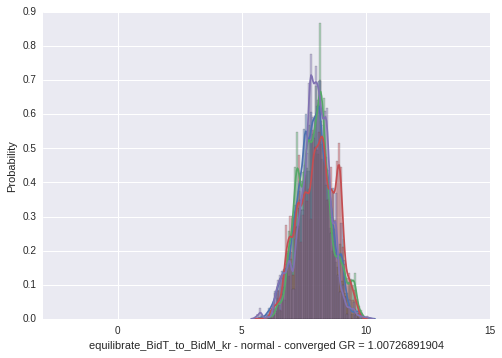

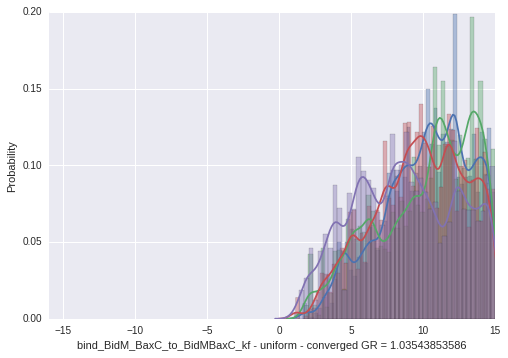

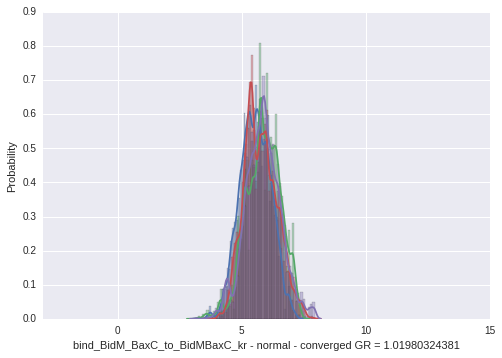

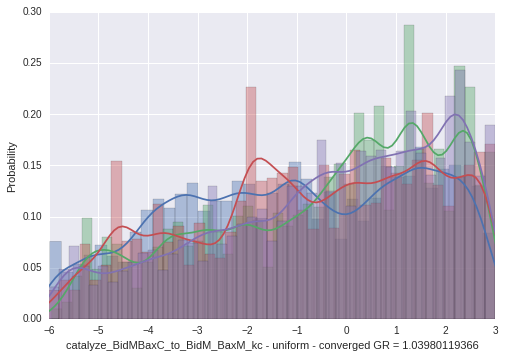

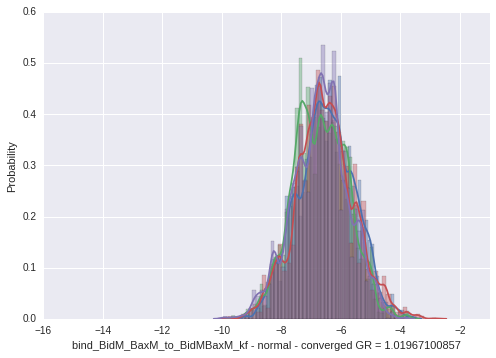

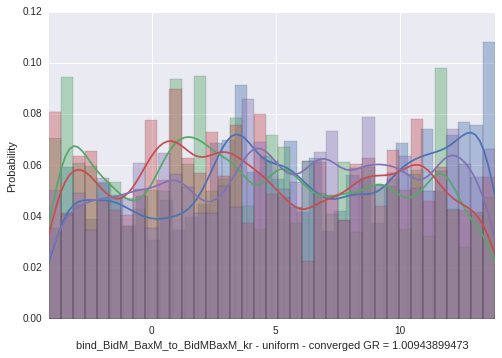

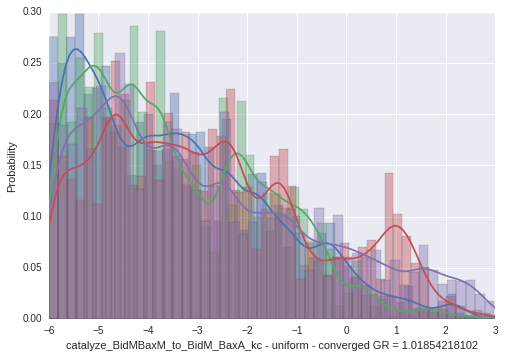

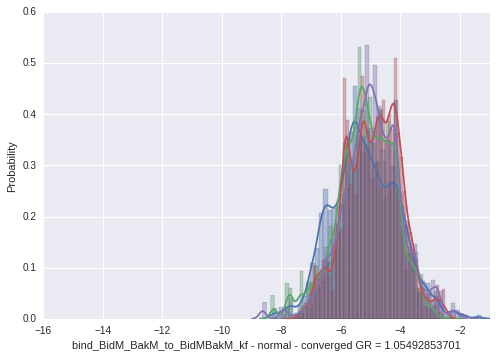

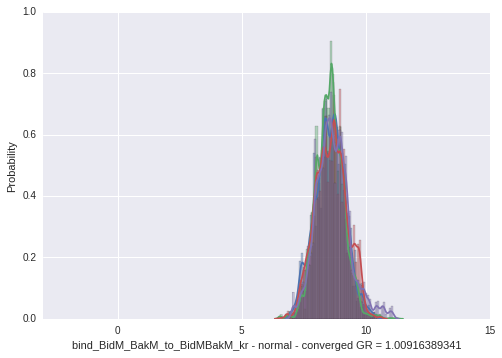

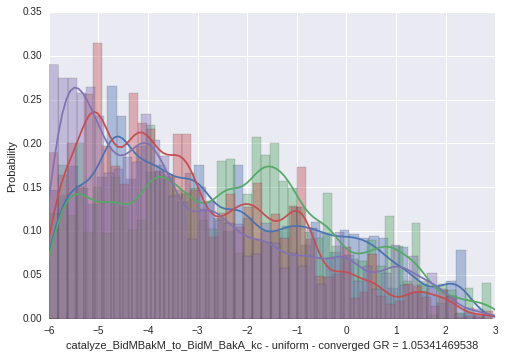

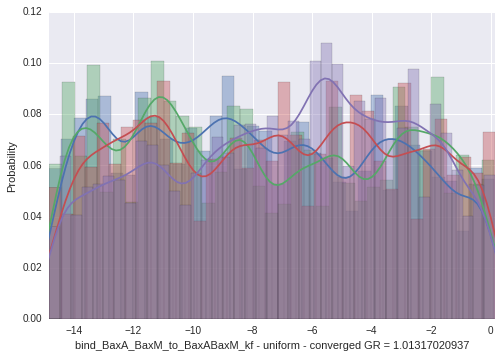

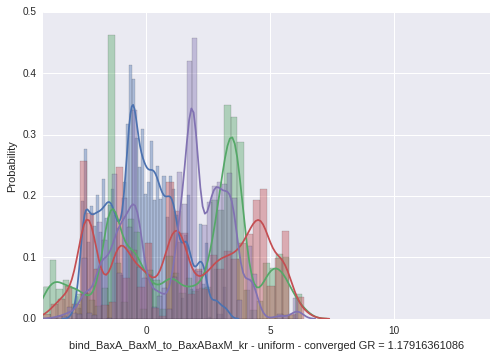

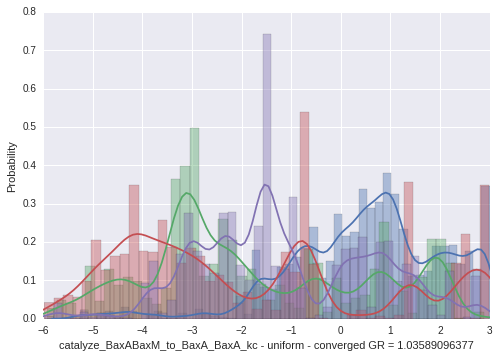

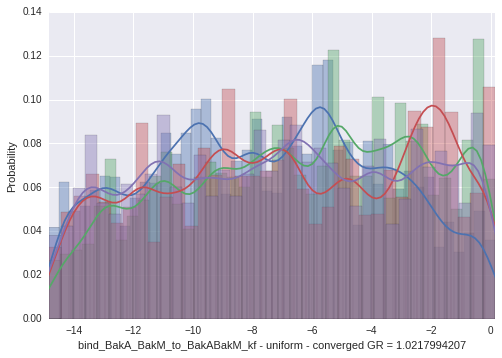

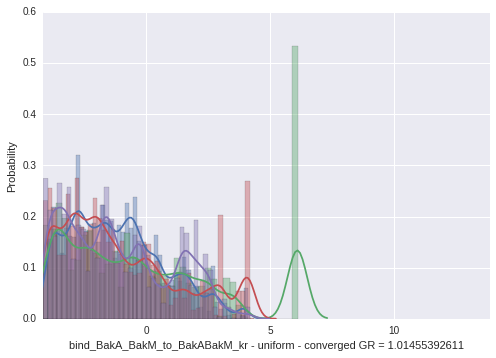

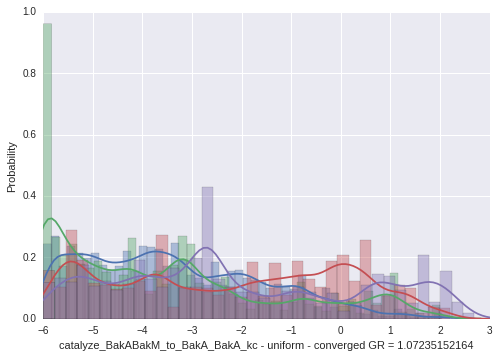

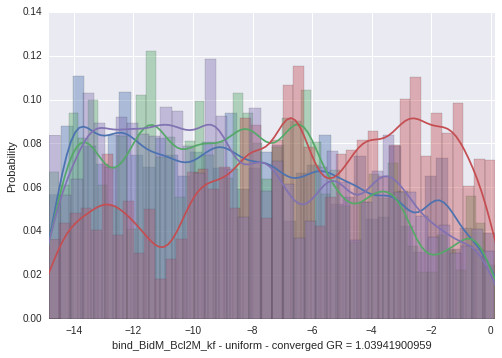

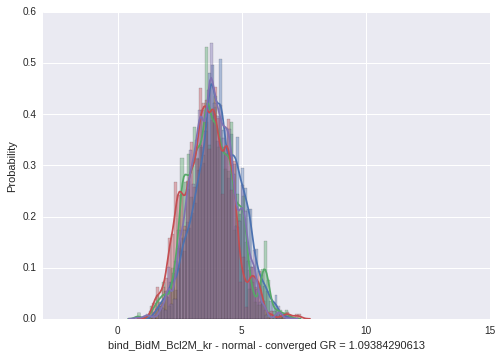

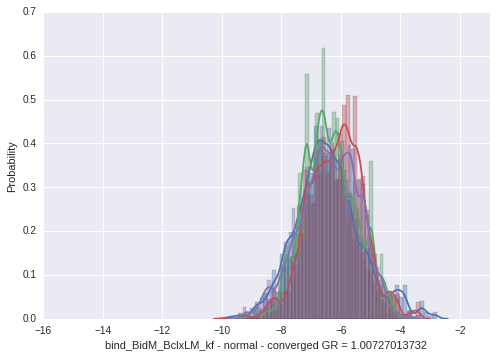

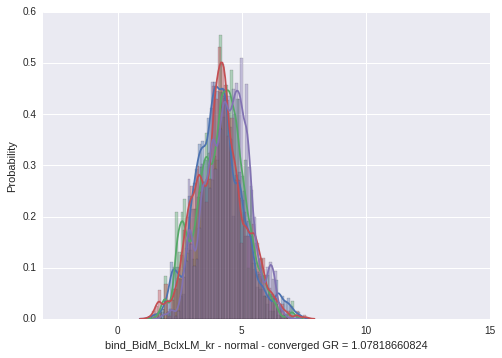

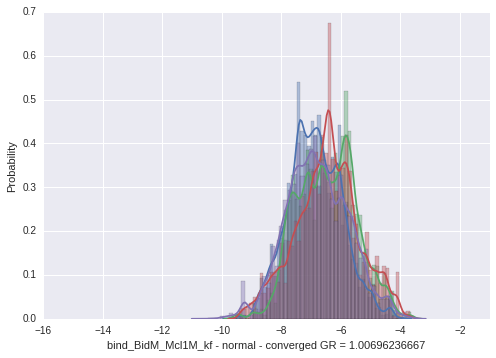

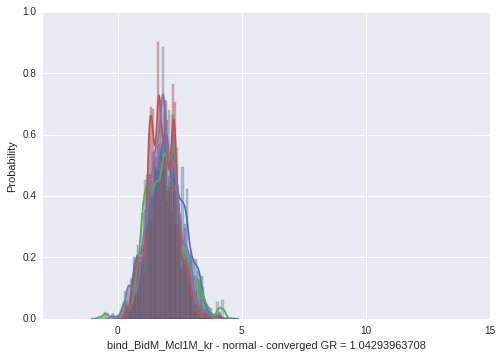

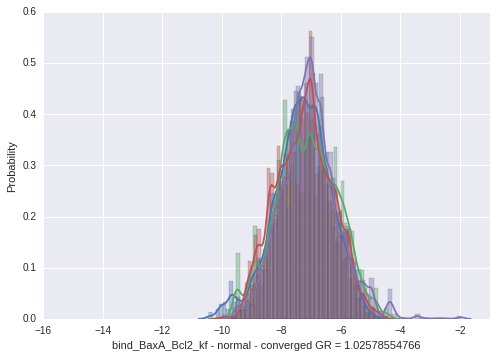

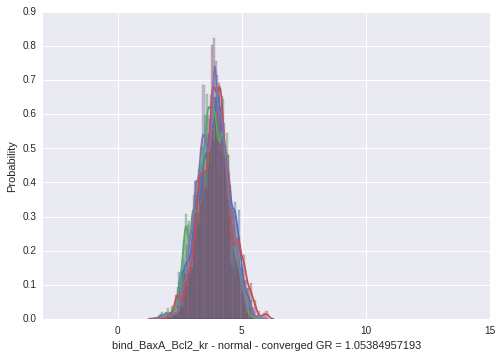

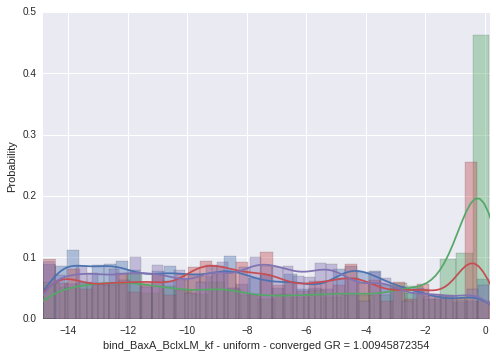

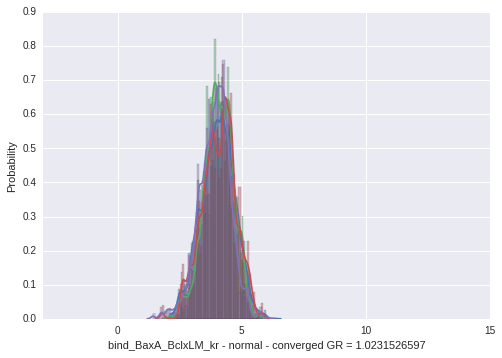

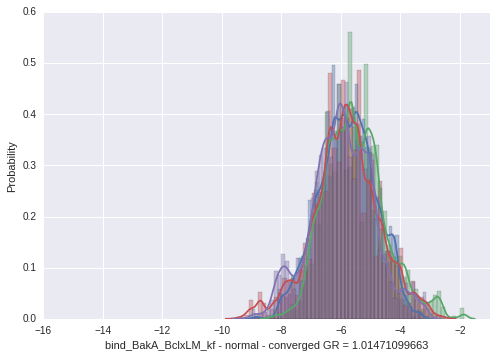

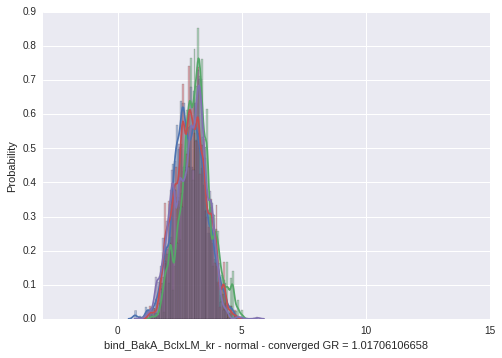

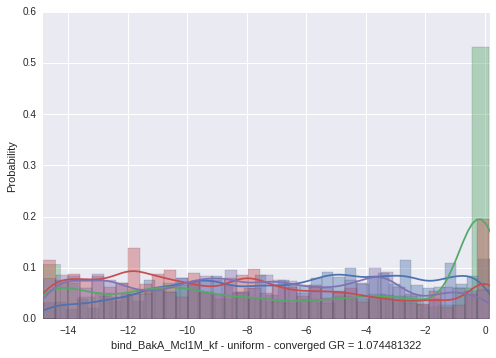

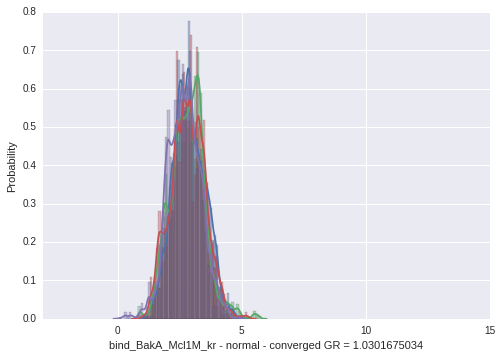

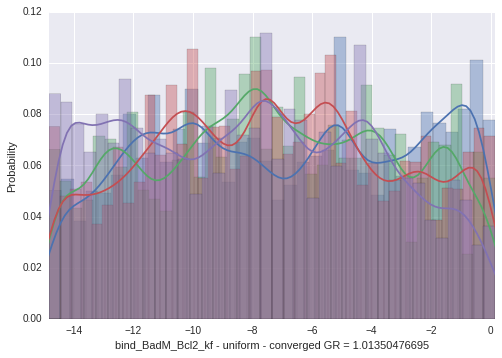

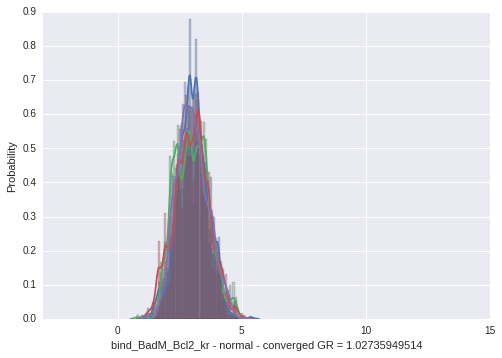

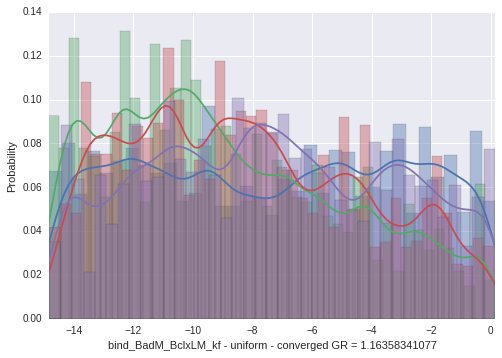

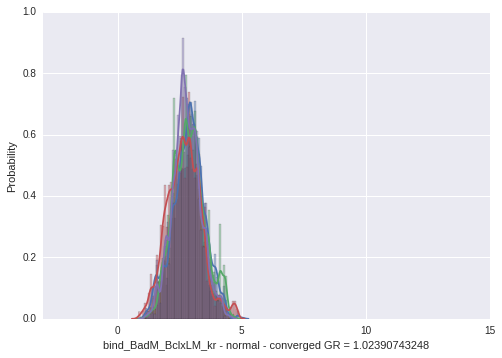

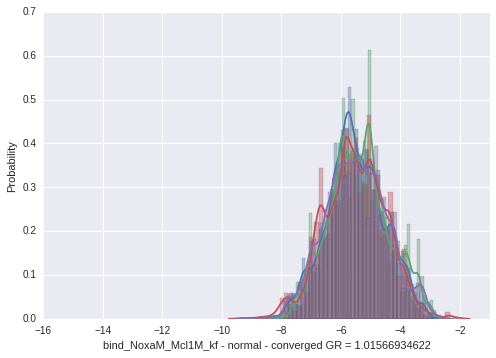

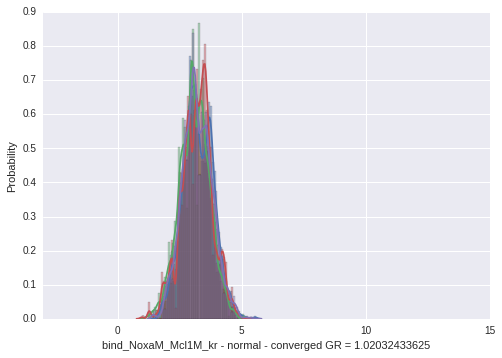

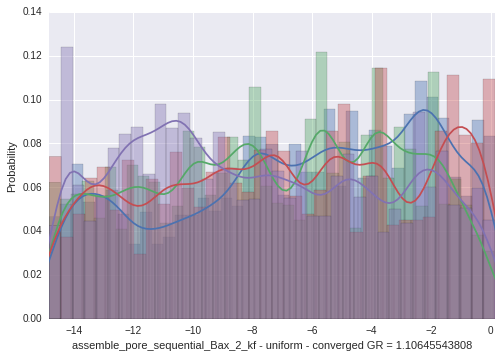

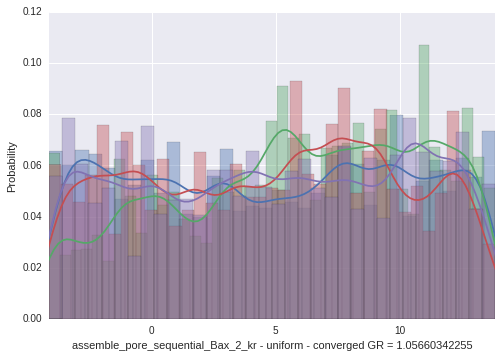

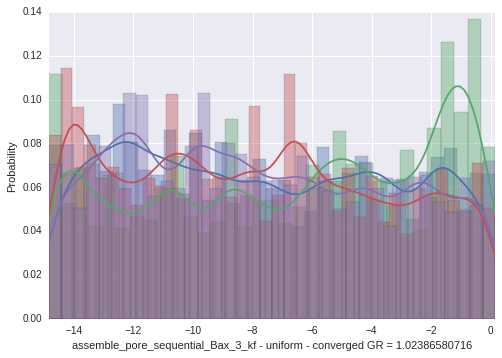

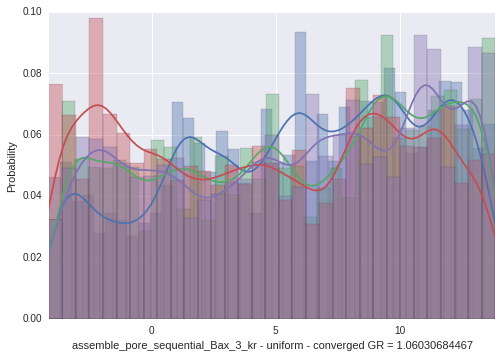

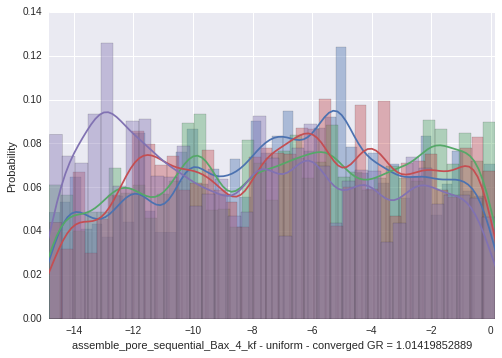

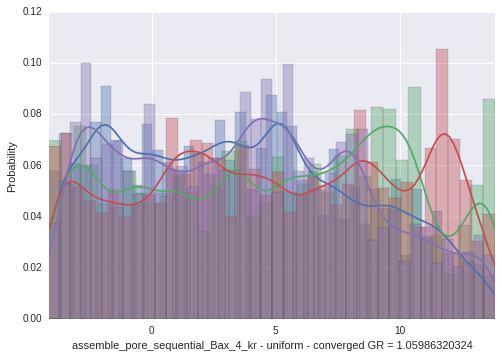

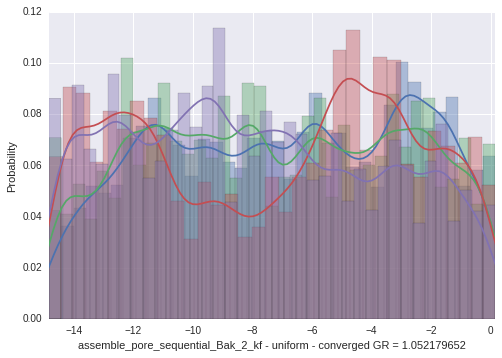

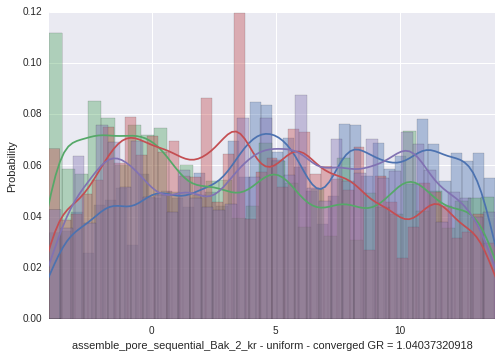

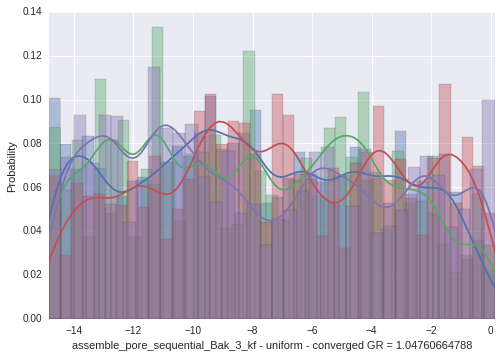

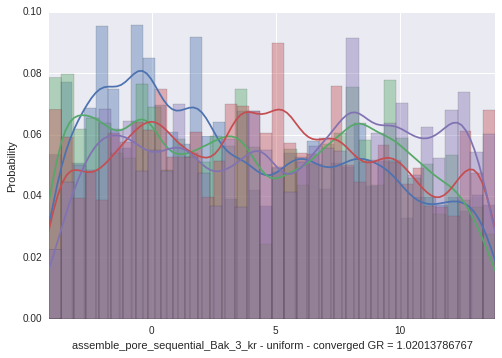

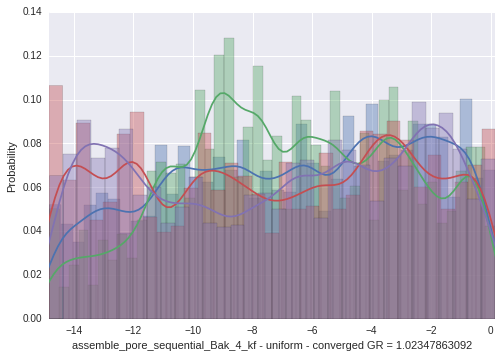

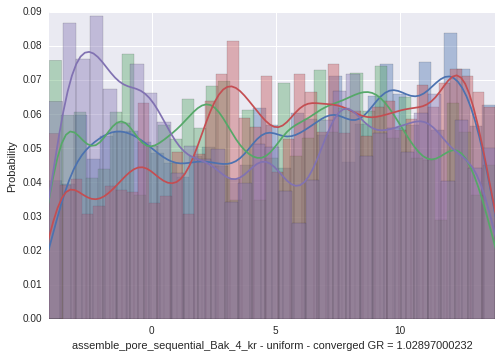

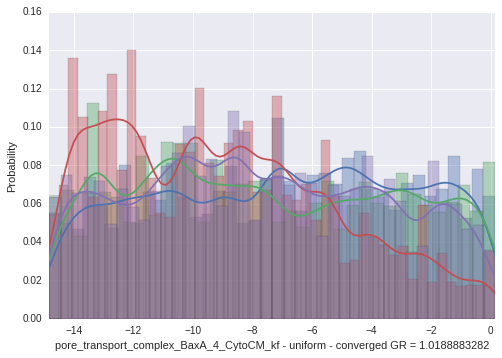

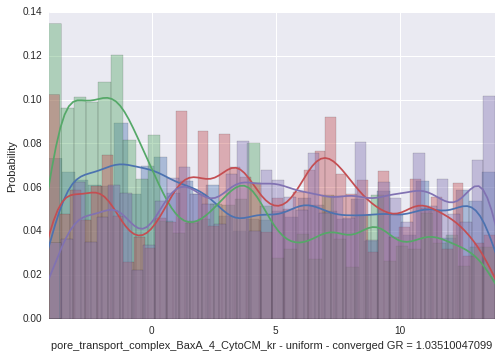

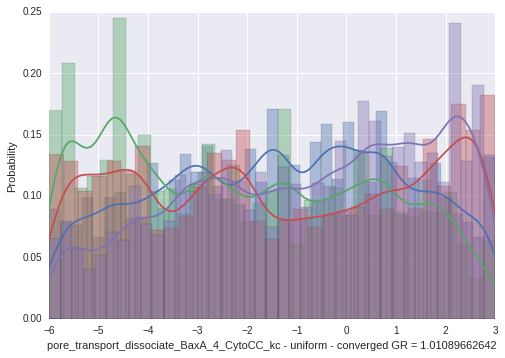

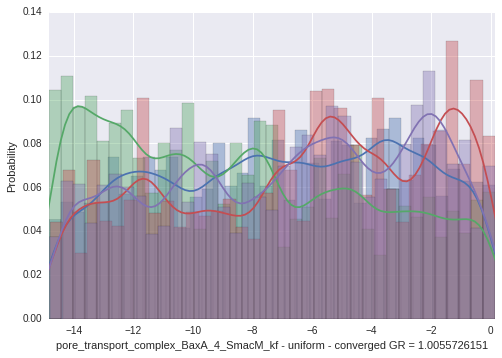

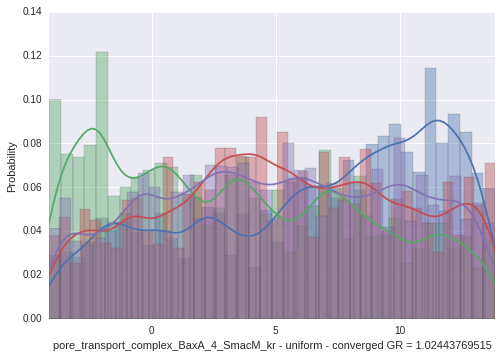

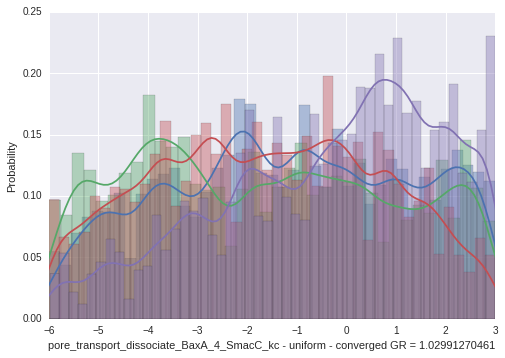

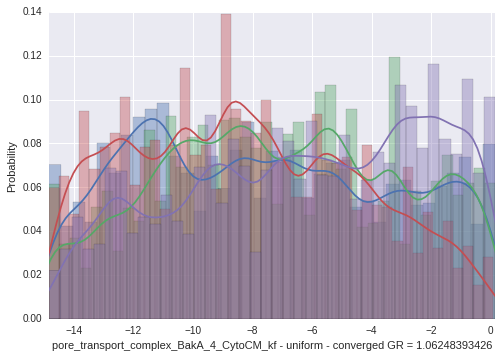

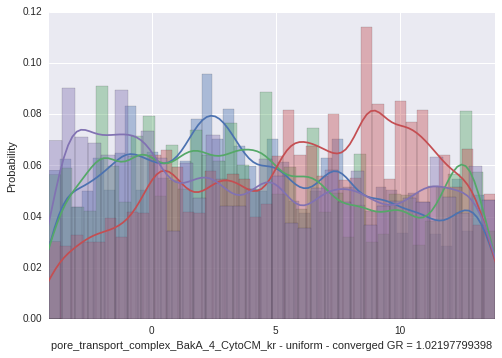

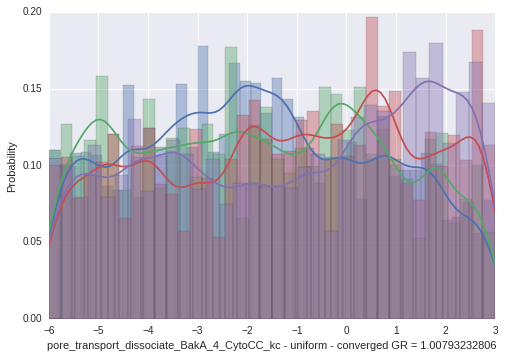

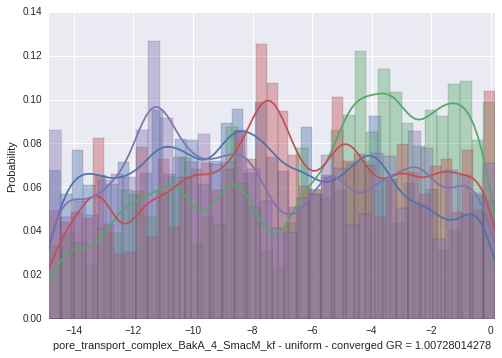

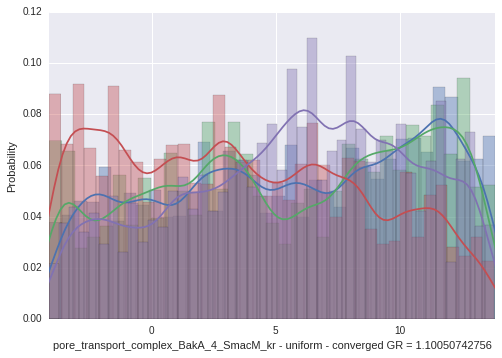

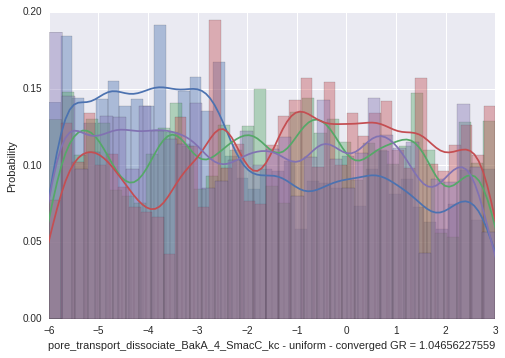

In [16]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True)
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    if earm_rates[param_name]['type'] == 'uniform':
        ax.set_xlim([earm_rates[param_name]['lower'], earm_rates[param_name]['upper']])
    elif 'kf' in param_name:
        ax.set_xlim([-16, -1])
    elif 'kr' in param_name:
        ax.set_xlim([-3, 15])
    elif 'kc' in param_name:
        ax.set_xlim([-6, 3])

In [17]:
import pandas as pd

In [18]:
df_a = pd.DataFrame(trace_arr_a, columns=param_trace_dict_a['param_list'])

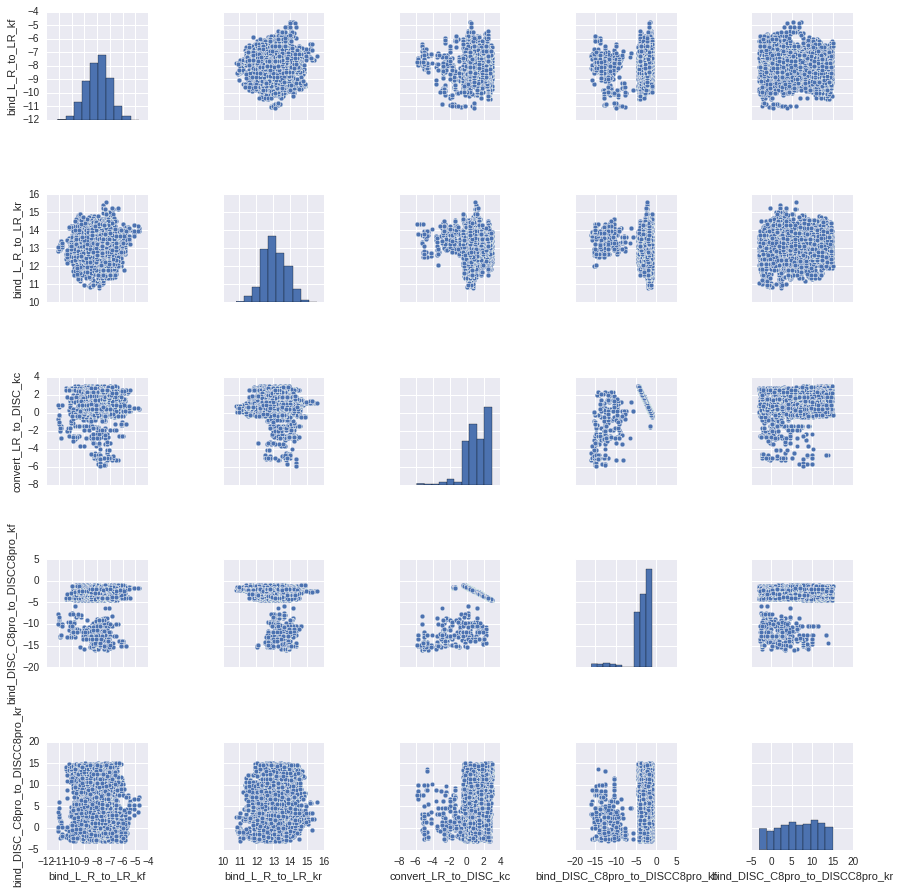

In [19]:
sns.pairplot(df_a, vars=param_trace_dict_a['param_list'][0:5])

In [20]:
os.chdir('/home/shockle/emcee')
from emcee import autocorr
autocorr.integrated_time(trace_arr_a)

array([ 89.20114103,  90.93276112,  96.45632451,  97.21522979,
        91.9930376 ,  92.3521569 ,  92.78724754,  92.40060298,
        91.82535494,  92.22469889,  92.5998434 ,  93.53894078,
        93.27411244,  96.66208321,  96.25097493,  92.05859428,
        93.25528926,  91.5116312 ,  91.11243965,  92.06092331,
        89.94341612,  92.78164105,  92.15061954,  91.85910941,
        90.33675248,  89.38455597,  90.50325461,  91.17519611,
        90.46395719,  91.35525011,  92.00271729,  91.06269617,
        91.11217603,  90.9596525 ,  92.23591655,  91.7038273 ,
        92.66397239,  89.10795953,  93.24013573,  92.56879767,
        89.2675777 ,  92.57310424,  97.62673172,  97.59989203,
        90.70935401,  90.02104281,  90.1801309 ,  89.69515946,
        93.09342771,  90.50316772,  92.05818264,  91.46575654,
        92.16630517,  88.38616571,  93.33436858,  92.41425185,
        97.42569133,  97.34631038,  90.32729853,  91.41376317,
        90.9566994 ,  92.6057965 ,  88.14664329,  92.43